<a href="https://colab.research.google.com/github/khadija9oor/CODSOFT/blob/main/Titanic_survived_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Khadija Noor
#session_start : 5 september
----------------------------------------------------------
 ### The Aim is to build a model that predict weather a passenger survived or not?

## Import importand libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


#Load Titanic dataset

In [ ]:
df = pd.read_csv('/content/tested.csv')

### some  of top  rows with columns

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

###Count plots visualize categorical data frequency, aiding quick insights into category distributions and comparisons among groups in data analysis.

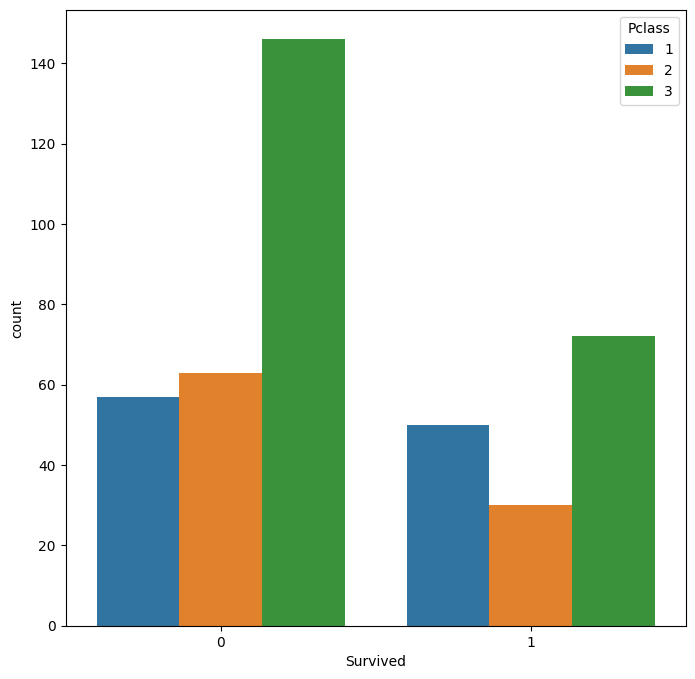

In [ ]:
plt.figure(figsize= (8, 8 ))
sns.countplot(x=df['Survived'], hue = df['Pclass'])
plt.show()

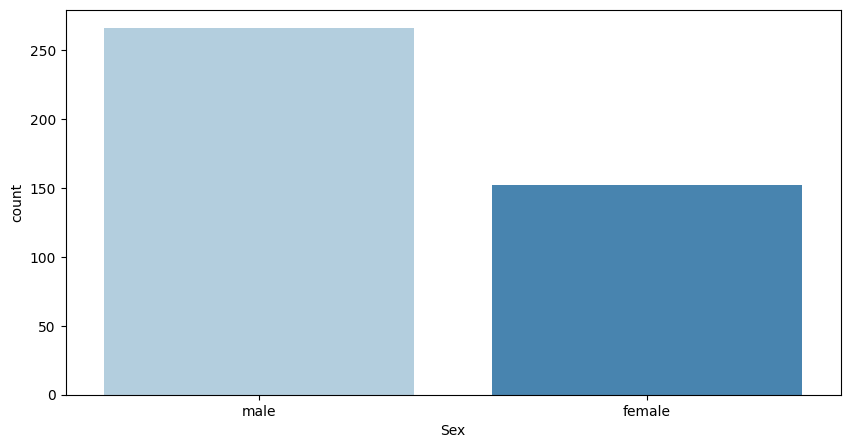

In [ ]:
sns.countplot(x="Sex", data=df, palette="Blues");
plt.show()

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

#Cleaning Data



> ### missing values



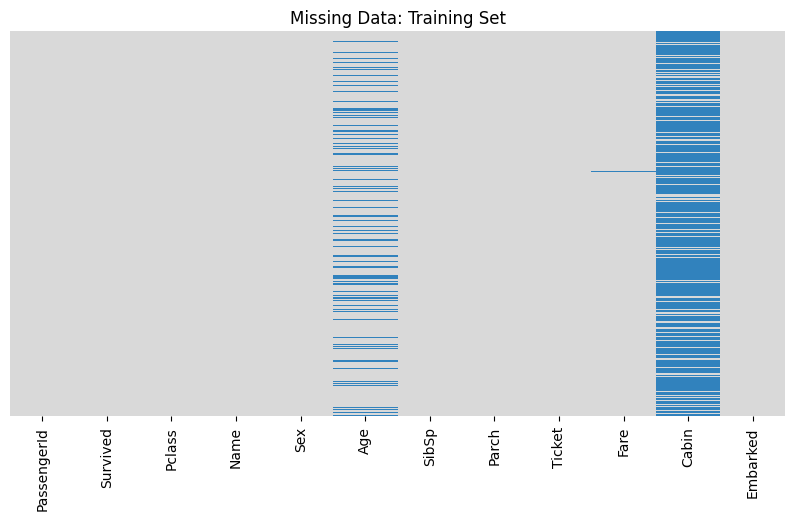

In [ ]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
df['Age']=df[['Age','Pclass']].apply(impute_age, axis =1 )
df = df.drop(["Fare"], axis =1)

In [ ]:
## drop irelevent features
df.drop(columns = ["Cabin", "Name","Ticket"], inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [ ]:
df.head(5)
df.shape

(418, 8)

In [ ]:
from sklearn.preprocessing import  LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] =labelencoder.fit_transform(df['Sex'])
df.head()


df['Embarked'] =labelencoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,0,3,1,34.5,0,0,1
1,893,1,3,0,47.0,1,0,2
2,894,0,2,1,62.0,0,0,1
3,895,0,3,1,27.0,0,0,2
4,896,1,3,0,22.0,1,1,2


<Axes: xlabel='Sex', ylabel='count'>

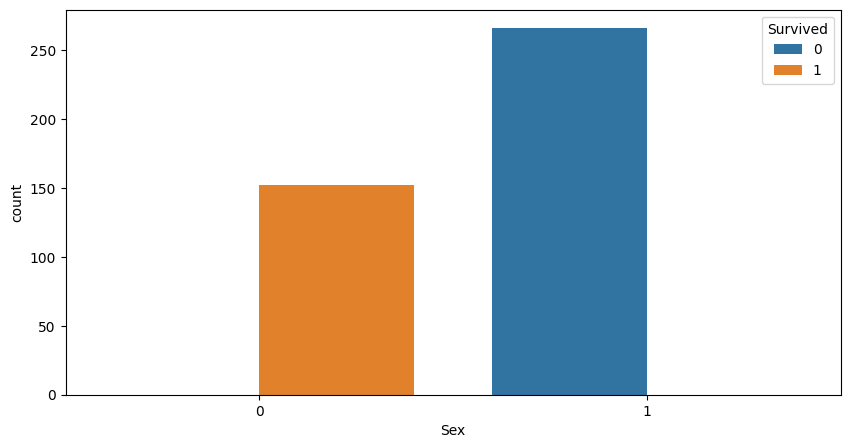

In [ ]:
sns.countplot(x=df['Sex'] , hue = df['Survived'])


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,0,3,1,34.5,0,0,1
1,893,1,3,0,47.0,1,0,2
2,894,0,2,1,62.0,0,0,1
3,895,0,3,1,27.0,0,0,2
4,896,1,3,0,22.0,1,1,2


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.636364,29.321770,0.447368,0.392344,1.401914
std,120.810458,0.481622,0.841838,0.481622,12.904065,0.896760,0.981429,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,1.000000
50%,1100.500000,0.000000,3.000000,1.000000,25.000000,0.000000,0.000000,2.000000
75%,1204.750000,1.000000,3.000000,1.000000,36.375000,1.000000,0.000000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,2.000000



##Now the train data is perfect for a machine learning algorithm:  
#all the data is numeric
#everything is concatenated together

# MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [ ]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['Survived'] # y is the column we're trying to predict


In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

##Model Training

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
# y_train.shape
y_train

395    1
13     0
147    0
156    1
382    1
      ..
63     1
326    1
337    0
11     0
351    0
Name: Survived, Length: 334, dtype: int64

In [ ]:
x_test.shape
x_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
257,1149,3,1,28.0,0,0,2
330,1222,2,0,48.0,0,2,2
314,1206,1,0,55.0,0,0,0
366,1258,3,1,24.0,1,0,0
363,1255,3,1,27.0,0,0,2
...,...,...,...,...,...,...,...
169,1061,3,0,22.0,0,0,2
65,957,2,0,29.0,0,0,2
48,940,1,0,60.0,0,0,0
18,910,3,0,27.0,1,0,2


##Logistic Regression

In [ ]:

# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)



Logistic Regression


LogisticRegression()

##Model Prediction

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
print(y_pred_log_reg)


[0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1]


In [ ]:
print(y_test)

257    0
330    1
314    1
366    0
363    0
      ..
169    1
65     1
48     1
18     1
15     1
Name: Survived, Length: 84, dtype: int64


In [ ]:

import warnings
warnings.filterwarnings('ignore')

result = log_reg.predict(x_test).all()
if result == 0:
  print("So sorry , not survived")
else:
  print("survived")

So sorry , not survived
